In [1]:
import pandas as pd 
import numpy as np

In [2]:
raw_sessiondata = pd.read_csv("20210321-165610.csv", skiprows=6, delimiter = ';')


In [3]:
#Add a column for 'timestamps'
import time
import datetime
import ciso8601

timestamp = []
for i in range(len(raw_sessiondata.index)):
    t = raw_sessiondata['PC-TIME'].iloc[i]
    ts= ciso8601.parse_datetime(t)
    if i == 0:
        t0= time.mktime(ts.timetuple())+ts.microsecond/1000000
        timestamp.append(np.around(t0-t0,3))
    else:
        tnow = time.mktime(ts.timetuple())+ts.microsecond/1000000
        timestamp.append(np.around(tnow-t0,3))

raw_sessiondata['timestamps'] = timestamp

In [4]:
df_group_msg = raw_sessiondata.groupby('MSG')
df_group_info = raw_sessiondata.groupby('+INFO')
df_group_type = raw_sessiondata.groupby('TYPE')

# Lick Timestamp

In [6]:
# Get Lick timestamps
df_port1out = df_group_info.get_group('Port1Out')
df_port1out = df_port1out.timestamps.to_numpy()

#df_port2out = df_group_info.get_group('Port2Out')
#df_port2out = df_port2out.timestamps.to_numpy()

df_port3out = df_group_info.get_group('Port3Out')
df_port3out = df_port3out.timestamps.to_numpy()

df_port4out = df_group_info.get_group('Port4Out')
df_port4out = df_port4out.timestamps.to_numpy()

In [7]:
#Aggregate all licking according to time
#allport = np.hstack((df_port1out,df_port2out, df_port3out,df_port4out))
allport = np.hstack((df_port1out,df_port3out,df_port4out))
sorted_allport = np.sort(allport)

# Audio Timstamp

In [8]:
# Find Audio timestamps ('BNC1High'), process so no duplicates
df_bnc1high = df_group_info.get_group('BNC1High')

In [9]:
a = df_bnc1high['timestamps'].diff().fillna(df_bnc1high['timestamps']) > 10
timestamps_bnc1high = df_bnc1high.loc[a].timestamps.to_numpy()

# Plot Raster

In [14]:
from matplotlib import pyplot as plt

In [15]:
count_licks,d=np.histogram(sorted_allport, bins=2800000,range=[0, 2800])

In [18]:
raster_licks = np.zeros((len(timestamps_bnc1high),10000))
for i,j in enumerate(timestamps_bnc1high):
    raster_licks[i] = (count_licks[int(j*1000)-5000:int(j*1000)+5000])

([<matplotlib.axis.XTick at 0x7fe4bdf7dcf8>,
 <a list of 4 Text xticklabel objects>)

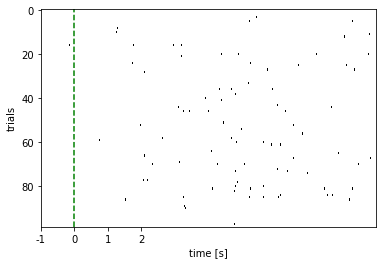

In [19]:
plt.imshow(raster_licks, aspect = 'auto', cmap='Greys', vmax=0.05)
plt.axvline(1000, color ='g', linestyle = '--')
plt.ylabel('trials')
plt.xlabel('time [s]')
plt.xticks([0,1000,2000,3000],[-1,0,1,2])